In [1]:
# Import 
import matplotlib.pyplot as plt
from lab2_functions import euler, leapfrog, runge, midpoint
import numpy as np


In [2]:
# Definitions
theFuncs = {
    'euler': euler,
    'leapfrog': leapfrog,
    'runge': runge,
}


def eval_fun(fun_choice, arg_dict):
    """
    Parameters
    ----------
    fun_choice: str
       name of finite difference approx from lab2_functions
    arg_dict: dict
       dictionary of arguments for lab2_functions
    Returns
    -------
    approxTime, approxTemp: tuple
        tuple of ndarray float vectors with time and temperature
    """
    npts = arg_dict['npts']
    tend = arg_dict['tend']
    To = arg_dict['To']
    Ta = arg_dict['Ta']
    theLambda = arg_dict['theLambda']
    approxTime, approxTemp = theFuncs[fun_choice](npts, tend, To, Ta,
                                                  theLambda)
    return approxTime, approxTemp



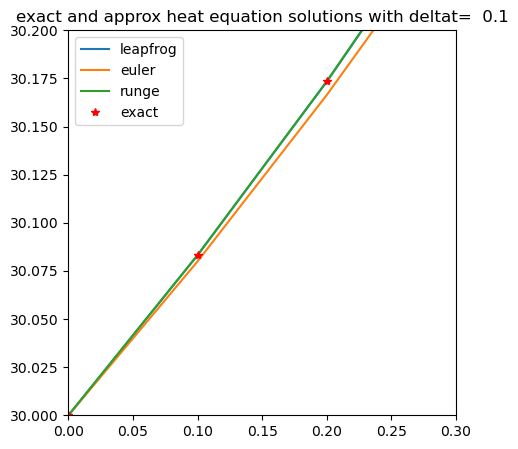

In [3]:
# %%
if __name__ == "__main__":

    Ta = 29
    To = 30
    tend = 5
    theLambda = 0.8
    npts = 50

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
    keep_curves = dict()
    fun_list = ['leapfrog', 'euler', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice)
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r*', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    ax1.set_xlim([0,0.3])
    ax1.set_ylim([30,30.2])
    #


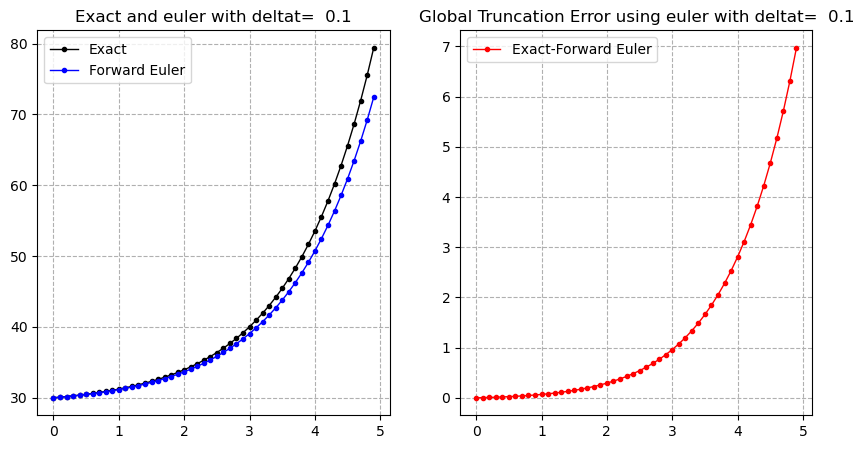

In [6]:
    # Make a second plot that shows the difference between exact and euler
    #
    plt.figure(figsize=(10,5)) 
    plt.subplot(1,2,1)
    fun_choice = 'euler'
    approxTemp = keep_curves[fun_choice][1]
    difference = exactTemp - approxTemp
    plt.plot(exactTime, exactTemp,'.-k',label='Exact',linewidth=1)
    plt.plot(exactTime, approxTemp,'.-b',label='Forward Euler',linewidth=1)
    title = f"Exact and {fun_choice} with deltat={deltat:5.2g}"
    plt.grid(linestyle='--')
    plt.title(title)
    plt.legend()
    #
    plt.subplot(1,2,2)
    fun_choice = 'euler'
    approxTemp = keep_curves[fun_choice][1]
    difference = np.abs(exactTemp - approxTemp)#global
    plt.plot(exactTime, difference,'.-r',label='Exact-Forward Euler',linewidth=1)
    title = f"Global Truncation Error using {fun_choice} with deltat={deltat:5.2g}"
    plt.grid(linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()

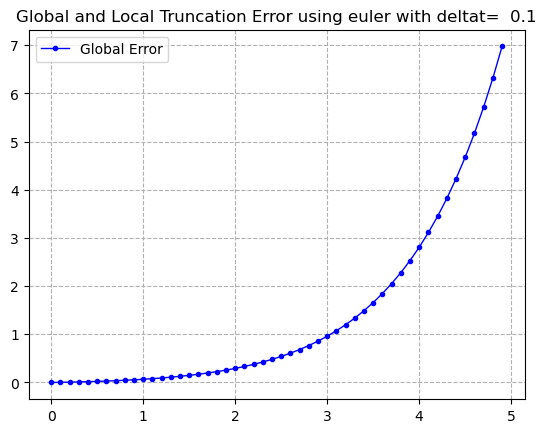

In [19]:
    difference1 = np.abs(approxTemp[1:]-exactTemp[0:-1])#local
    #plt.plot(exactTime[1:-1], difference1,'.-r',label='Local Error',linewidth=1)
    plt.plot(exactTime, difference,'.-b',label='Global Error',linewidth=1)
    title = f"Global and Local Truncation Error using {fun_choice} with deltat={deltat:5.2g}"
    plt.grid(linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()

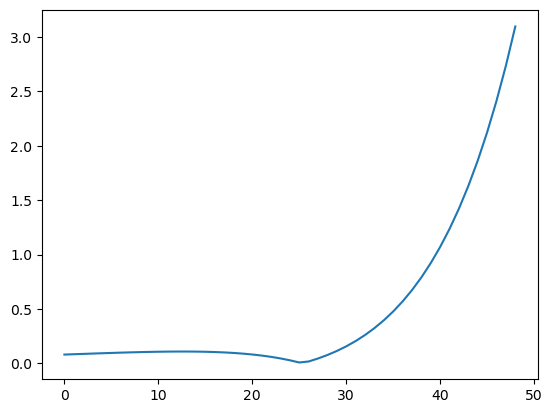

In [20]:
plt.plot(difference1)

In [21]:
from scipy.stats import linregress
slope = linregress(np.log(exactTime[2:]), np.log(difference1[1:])).slope

In [22]:
slope

0.9739858962821691

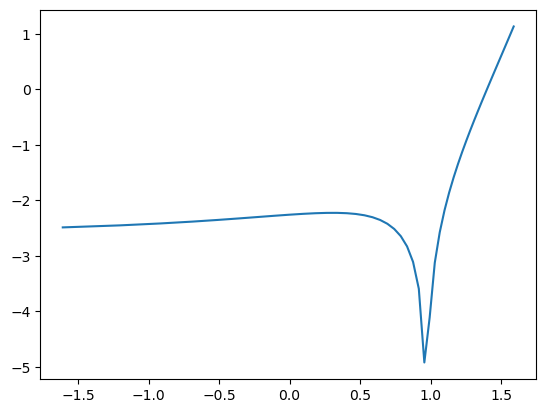

In [23]:
plt.plot(np.log(exactTime[2:]), np.log(difference1[1:]))